In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scipy
from sklearn import preprocessing
import tensorflow as tf
from numpy.fft import *

import os
from os import listdir
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from verta.integrations.keras import VertaCallback

In [2]:
NUMBER_OF_FEATURES=3387

In [7]:
path_Fifth_sticker= '../../First Dataset collected on 3 December 2020/Data_to_be_process/Fifth_Sticker'


In [10]:
Sticker_BackgroundRFactivities = pd.read_csv(path_Fifth_sticker+'/BackgroundRFactivities.csv')
Sticker_Connected = pd.read_csv(path_Fifth_sticker+'/Connected.csv')
Sticker_Searching = pd.read_csv(path_Fifth_sticker+'/Searching.csv')
Sticker_Searching_without_connected = pd.read_csv(path_Fifth_sticker+'/Searching_without_connecting_to_app.csv')

In [11]:
Sticker_BackgroundRFactivities

,Version,0.3
0,0.000026,-0.000031
1,0.000071,-0.000081
2,0.000043,0.000008
3,-0.000022,0.000014
4,-0.000039,-0.000064
...,...,...
3386995,-0.000011,0.000027
3386996,-0.000046,0.000016
3386997,-0.000042,-0.000012
3386998,-0.000019,-0.000011


In [12]:
# Renaming the Title of each coloum 

Sticker_BackgroundRFactivities=Sticker_BackgroundRFactivities.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
Sticker_Connected=Sticker_Connected.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
Sticker_Searching=Sticker_Searching.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
Sticker_Searching_without_connected=Sticker_Searching_without_connected.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})

print(type(Sticker_BackgroundRFactivities))

<class 'pandas.core.frame.DataFrame'>


In [13]:
Sticker_BackgroundRFactivities

,I_Data,Q_Data
0,0.000026,-0.000031
1,0.000071,-0.000081
2,0.000043,0.000008
3,-0.000022,0.000014
4,-0.000039,-0.000064
...,...,...
3386995,-0.000011,0.000027
3386996,-0.000046,0.000016
3386997,-0.000042,-0.000012
3386998,-0.000019,-0.000011


In [14]:
# converting Pandas to Numpy for easier plotting
Sticker_BackgroundRFactivities_numpy = Sticker_BackgroundRFactivities.to_numpy()
Sticker_Connected_numpy = Sticker_Connected.to_numpy()
Sticker_Searching_numpy = Sticker_Searching.to_numpy()
Sticker_Searching_without_connected_numpy = Sticker_Searching_without_connected.to_numpy()

In [15]:
I_Data_BackgroundRFactivities = Sticker_BackgroundRFactivities_numpy[0:,0]
Q_Data_BackgroundRFactivities = Sticker_BackgroundRFactivities_numpy[0:,1]

I_Data_BackgroundRFactivities= I_Data_BackgroundRFactivities.reshape(1000,NUMBER_OF_FEATURES)
Q_Data_BackgroundRFactivities= Q_Data_BackgroundRFactivities.reshape(1000,NUMBER_OF_FEATURES)

Concatenate_IQ_BackgroundRFactivities_2Dim = np.concatenate((I_Data_BackgroundRFactivities,Q_Data_BackgroundRFactivities),axis=1)


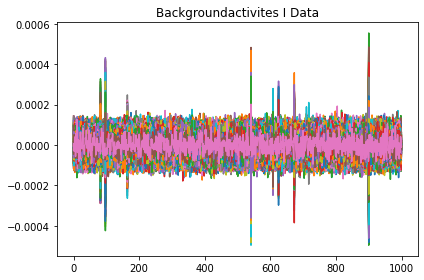

In [16]:
plt.plot(I_Data_BackgroundRFactivities)
plt.title("Backgroundactivites I Data")
plt.tight_layout()
plt.show()

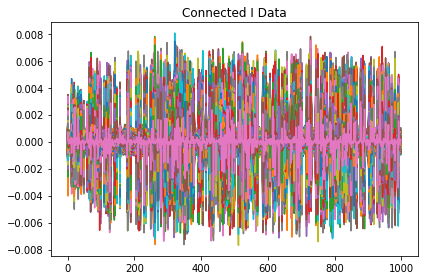

In [17]:
I_Data_Connected = Sticker_Connected_numpy[0:,0]
Q_Data_Connected = Sticker_Connected_numpy[0:,1]

I_Data_Connected= I_Data_Connected.reshape(1000,NUMBER_OF_FEATURES)
Q_Data_Connected= Q_Data_Connected.reshape(1000,NUMBER_OF_FEATURES)

Concatenate_IQ_Connected_2Dim = np.concatenate((I_Data_Connected,Q_Data_Connected),axis=1)

plt.plot(I_Data_Connected[0:])
plt.title("Connected I Data")
plt.tight_layout()
plt.show()

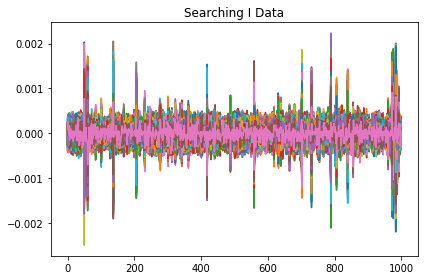

In [18]:
I_Data_Searching = Sticker_Searching_numpy[0:,0]
Q_Data_Searching = Sticker_Searching_numpy[0:,1]

I_Data_Searching= I_Data_Searching.reshape(1000,NUMBER_OF_FEATURES)
Q_Data_Searching= Q_Data_Searching.reshape(1000,NUMBER_OF_FEATURES)

Concatenate_IQ_Searching_2Dim = np.concatenate((I_Data_Searching,Q_Data_Searching),axis=1)


plt.plot(I_Data_Searching[0:3877])
plt.title("Searching I Data")
plt.tight_layout()
plt.show()

In [19]:
I_Data_Searching_WIFI_established = Sticker_Searching_without_connected_numpy[0:,0]
Q_Data_Searching_WIFI_established = Sticker_Searching_without_connected_numpy[0:,1]

I_Data_Searching_WIFI_established= I_Data_Searching_WIFI_established.reshape(1000,NUMBER_OF_FEATURES)
Q_Data_Searching_WIFI_established= Q_Data_Searching_WIFI_established.reshape(1000,NUMBER_OF_FEATURES)

Concatenate_IQ_Searching_WIFI_established_2Dim = np.concatenate((I_Data_Searching_WIFI_established,Q_Data_Searching_WIFI_established),axis=1)


In [20]:
Concatenate_IQ_Searching_WIFI_established_2Dim.shape

(1000, 6774)

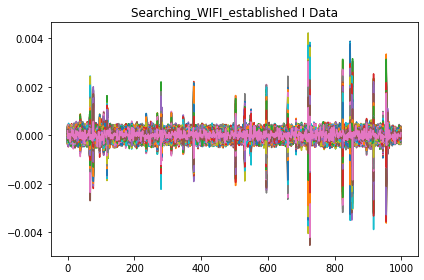

In [21]:
plt.plot(I_Data_Searching_WIFI_established[0:3877])
plt.title("Searching_WIFI_established I Data")
plt.tight_layout()
plt.show()

In [22]:
from sklearn.preprocessing import RobustScaler,StandardScaler

scaler_backgroundRFactivites = StandardScaler()
scaler_backgroundRFactivites_scaled = scaler_backgroundRFactivites.fit(Concatenate_IQ_BackgroundRFactivities_2Dim)
IQ_BackgroundRFactivites_numpy_scaled= scaler_backgroundRFactivites_scaled.transform(Concatenate_IQ_BackgroundRFactivities_2Dim)

scaler_connected = StandardScaler()
scaler_connected_scaled = scaler_connected.fit(Concatenate_IQ_Connected_2Dim)
IQ_connected_numpy_scaled= scaler_connected_scaled.transform(Concatenate_IQ_Connected_2Dim)


scaler_searching = StandardScaler()
scaler_searching_scaled = scaler_searching.fit(Concatenate_IQ_Searching_2Dim)
IQ_searching_numpy_scaled= scaler_backgroundRFactivites_scaled.transform(Concatenate_IQ_Searching_2Dim)

scaler_searching_WIFI_established = StandardScaler()
scaler_searching_WIFI_established_scaled = scaler_searching_WIFI_established.fit(Concatenate_IQ_Searching_WIFI_established_2Dim)
IQ_searching_WIFI_established_numpy_scaled= scaler_searching_WIFI_established_scaled.transform(Concatenate_IQ_Searching_WIFI_established_2Dim)

In [23]:
from sklearn.preprocessing import OneHotEncoder

Label =[['BackgroundRFactivities'],['Connected'],['Searching'],['Searching_WIFI_Establised']]

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(Label)

Labelled = enc.transform(Label)

Labelled

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [24]:
np.random.seed(2016)

IQ_backgroundRFactivites_concatenate = np.tile(Labelled[0][np.newaxis,:],(IQ_BackgroundRFactivites_numpy_scaled.shape[0],1))
IQ_BackgroundRFactivites_dataset=np.concatenate((IQ_BackgroundRFactivites_numpy_scaled,IQ_backgroundRFactivites_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_BackgroundRFactivites_dataset.shape))

IQ_connected_concatenate = np.tile(Labelled[1][np.newaxis,:],(IQ_connected_numpy_scaled.shape[0],1))
IQ_connected_dataset=np.concatenate((IQ_connected_numpy_scaled,IQ_connected_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_connected_dataset.shape))

IQ_searching_concatenate = np.tile(Labelled[2][np.newaxis,:],(IQ_searching_numpy_scaled.shape[0],1))
IQ_searching_dataset=np.concatenate((IQ_searching_numpy_scaled,IQ_searching_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_searching_dataset.shape))

IQ_searching_wifi_established_concatenate = np.tile(Labelled[3][np.newaxis,:],(IQ_searching_WIFI_established_numpy_scaled.shape[0],1))
IQ_searching_wifi_established_dataset=np.concatenate((IQ_searching_WIFI_established_numpy_scaled,IQ_searching_wifi_established_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_searching_wifi_established_dataset.shape))

print('\n')
print(IQ_BackgroundRFactivites_dataset[0:5])
print('\n')
print(IQ_connected_dataset[0:5])
print('\n')
print(IQ_searching_dataset[0:5])
print('\n')
print(IQ_searching_wifi_established_dataset[0:5])

Connected dataset shape : (1000, 6778)
Connected dataset shape : (1000, 6778)
Connected dataset shape : (1000, 6778)
Connected dataset shape : (1000, 6778)


[[ 0.75622814  2.00314922  1.25889316 ...  0.          0.
   0.        ]
 [-0.24932282 -1.16558698 -1.19321922 ...  0.          0.
   0.        ]
 [-0.77022387  0.07114845 -0.73765714 ...  0.          0.
   0.        ]
 [-0.01006527 -0.33647822 -0.2597414  ...  0.          0.
   0.        ]
 [ 0.39427441  1.16129346  0.33022563 ...  0.          0.
   0.        ]]


[[ 0.12437616  0.01420218  0.11266155 ...  1.          0.
   0.        ]
 [ 0.00816005 -0.0921743  -0.08483561 ...  1.          0.
   0.        ]
 [-0.01878556  0.03825415  0.0831748  ...  1.          0.
   0.        ]
 [-0.03949024 -0.27412124 -0.11233521 ...  1.          0.
   0.        ]
 [-0.28659707 -0.20271579 -0.08217539 ...  1.          0.
   0.        ]]


[[-0.64864311  0.5430643  -0.50732949 ...  0.          1.
   0.        ]
 [-1.08226257  0.47877512  0.1867

In [25]:
import copy

stacked_data=np.vstack((IQ_BackgroundRFactivites_dataset,IQ_connected_dataset,IQ_searching_dataset,IQ_searching_wifi_established_dataset))
Dataset_Label_shuffled = copy.copy(stacked_data)
np.random.shuffle(Dataset_Label_shuffled)

In [26]:
length_of_X_train = int(0.7*Dataset_Label_shuffled.shape[0]) #94836
length_of_X_validation = (int(0.2*Dataset_Label_shuffled.shape[0]))+length_of_X_train #27096 #121932
print(length_of_X_validation)

3600


In [27]:
Train_Dataset = Dataset_Label_shuffled[0:length_of_X_train,0:6774]
print(Train_Dataset.shape)
Y_Train_Dataset = Dataset_Label_shuffled[0:length_of_X_train,6774:]
print(Y_Train_Dataset)

(2800, 6774)
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [28]:
Validation_Dataset = Dataset_Label_shuffled[length_of_X_train:length_of_X_validation,0:6774]
Y_Validation_Dataset = Dataset_Label_shuffled[length_of_X_train:length_of_X_validation,6774:]
print(Validation_Dataset.shape)

(800, 6774)


In [29]:
Train_Dataset=Train_Dataset.reshape(2800,6774,1)
Validation_Dataset=Validation_Dataset.reshape(800,6774,1)
print(Validation_Dataset.shape)

(800, 6774, 1)


In [24]:
  
import keras
import keras.models as models
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D, Conv1D, MaxPooling1D
from keras.layers.core import Flatten, Dense, Dropout, Activation, Reshape

def getBaselineModel(slice_size, classes=4, cnn_stacks=3, fc_stacks=1, channels=128, dropout_flag=True, \
                        fc1=256, fc2=128, batchnorm=False, \
                        #optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), \
                        loss='categorical_crossentropy'):
    """A dummy model to test the functionalities of the Data Generator"""
    model = models.Sequential()
    model.add(Conv1D(channels,7,activation='relu', padding='same', input_shape=(slice_size, 1)))
    model.add(Conv1D(channels,5, padding='same'))
    if batchnorm:
        model.add(keras.layers.BatchNormalization(momentum=0.9, name='bn_1'))
    model.add(Activation('relu'))
    model.add(MaxPooling1D())
    for i in range(1, cnn_stacks):
        model.add(Conv1D(channels,7,activation='relu', padding='same'))
        model.add(Conv1D(channels,5, padding='same'))
        if batchnorm:
            model.add(keras.layers.BatchNormalization(momentum=0.9, name='bn_'+str(i+1)))
        model.add(Activation('relu'))
        model.add(MaxPooling1D())
    #model.add(Conv1D(128,7,activation='relu', padding='same'))
    #model.add(Conv1D(128,5,activation='relu', padding='same'))
    #model.add(MaxPooling1D())
    model.add(Flatten())
    for j in range(1, fc_stacks):
        model.add(Dense(fc1, activation='relu'))
        if dropout_flag:
            model.add(Dropout(0.5))
    model.add(Dense(fc2, activation='relu'))
    if dropout_flag:
        model.add(Dropout(0.5))
    model.add(Dense(classes, activation='softmax'))

    #optimizer = optimizer
    #optimizer = Adam(lr=lr, beta_1=beta_2, beta_2=beta_2, epsilon=epsilon, decay=decay, amsgrad=amsgrad)
    #model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    model.summary()

    return model

In [32]:
model= getBaselineModel(slice_size=6774)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 6774, 128)         1024      
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 6774, 128)         82048     
_________________________________________________________________
activation_3 (Activation)    (None, 6774, 128)         0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 3387, 128)         0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 3387, 128)         114816    
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 3387, 128)         82048     
_________________________________________________________________
activation_4 (Activation)    (None, 3387, 128)        

In [33]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
history3 = model.fit(Train_Dataset, Y_Train_Dataset, epochs=6000, batch_size=100,validation_data=(Validation_Dataset, Y_Validation_Dataset),
    callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')])

Epoch 1/6000
28/28 [==============================] - 9s 309ms/step - loss: 0.9334 - accuracy: 0.6057 - val_loss: 0.5511 - val_accuracy: 0.8763
Epoch 2/6000
28/28 [==============================] - 9s 308ms/step - loss: 0.3558 - accuracy: 0.9225 - val_loss: 0.1778 - val_accuracy: 0.9712
Epoch 3/6000
28/28 [==============================] - 9s 310ms/step - loss: 0.1375 - accuracy: 0.9721 - val_loss: 0.1129 - val_accuracy: 0.9787
Epoch 4/6000
28/28 [==============================] - 9s 311ms/step - loss: 0.1041 - accuracy: 0.9764 - val_loss: 0.1128 - val_accuracy: 0.9762
Epoch 5/6000
28/28 [==============================] - 9s 313ms/step - loss: 0.1347 - accuracy: 0.9711 - val_loss: 0.1810 - val_accuracy: 0.9600
Epoch 6/6000
28/28 [==============================] - 9s 313ms/step - loss: 0.1203 - accuracy: 0.9754 - val_loss: 0.0976 - val_accuracy: 0.9762
Epoch 7/6000
28/28 [==============================] - 9s 314ms/step - loss: 0.0953 - accuracy: 0.9768 - val_loss: 0.0985 - val_accuracy:

In [35]:
_, accuracy_test = model.evaluate(Validation_Dataset, Y_Validation_Dataset)
print('Accuracy: %.2f' % (accuracy_test*100))

25/25 [==============================] - 1s 36ms/step - loss: 0.1153 - accuracy: 0.9800
Accuracy: 98.00


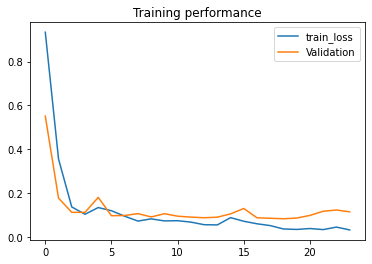

In [36]:
plt.figure()
plt.title('Training performance')
plt.plot(history3.history['loss'], label='train_loss')
plt.plot(history3.history['val_loss'], label='Validation')
plt.legend()
plt.show()

In [37]:
#model.save("{MODEL RFMLS} Fifth_Sticker_TRAINED")
model.save("{MODEL First RFMLS} Fifth_Sticker_TRAINED")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: {MODEL First RFMLS} Fifth_Sticker_TRAINED/assets


# First Attempt Trained Model

### Using First Model as Trained Model

In [32]:
from tensorflow import keras
load_first_sticker_model = keras.models.load_model("{MODEL RFMLS} First_Sticker_TRAINED")
_,accuracy=load_first_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

25/25 [==============================] - 1s 34ms/step - loss: 6.8647 - accuracy: 0.4975
49.75000023841858


### Using Third Model as Trained Model

In [31]:
from tensorflow import keras
load_third_sticker_model = keras.models.load_model("{MODEL RFMLS} Third_Sticker_TRAINED")
_,accuracy=load_third_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

25/25 [==============================] - 1s 31ms/step - loss: 0.6803 - accuracy: 0.9262
92.62499809265137


### Using Fourth Model as Trained Model

In [33]:
from tensorflow import keras
load_fourth_sticker_model = keras.models.load_model("{MODEL RFMLS} Fourth_Sticker_TRAINED")
_,accuracy=load_fourth_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

25/25 [==============================] - 1s 35ms/step - loss: 0.4536 - accuracy: 0.9212
92.12499856948853


### Using Fifth Model as Trained Model

In [34]:
from tensorflow import keras
load_fifth_sticker_model = keras.models.load_model("{MODEL RFMLS} Fifth_Sticker_TRAINED")
_,accuracy=load_fifth_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

25/25 [==============================] - 1s 35ms/step - loss: 0.1253 - accuracy: 0.9825
98.25000166893005


# Second Attempt Trained Model

### Using First Sticker Model as Trained Model

In [36]:
from tensorflow import keras
load_first_sticker_model = keras.models.load_model("../../Second Dataset collected on 16 December 2020/Pre-processed file/{MODEL Second RFMLS} First_Sticker_TRAINED")
_,accuracy=load_first_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

25/25 [==============================] - 1s 35ms/step - loss: 4.4461 - accuracy: 0.4938
49.37500059604645


### Using Second Sticker Model as Trained Model

In [37]:
from tensorflow import keras
load_Second_sticker_model = keras.models.load_model("../../Second Dataset collected on 16 December 2020/Pre-processed file/{MODEL Second RFMLS} Second_Sticker_TRAINED")
_,accuracy=load_Second_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

25/25 [==============================] - 1s 35ms/step - loss: 3.5440 - accuracy: 0.5063
50.62500238418579


### Using Third Sticker Model as Trained Model

In [38]:
from tensorflow import keras
load_third_sticker_model = keras.models.load_model("../../Second Dataset collected on 16 December 2020/Pre-processed file/{MODEL Second RFMLS} Third_Sticker_TRAINED")
_,accuracy=load_third_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

25/25 [==============================] - 1s 35ms/step - loss: 2.4085 - accuracy: 0.5300
52.99999713897705


### Using Fourth Sticker Model as Trained Model

In [28]:
from tensorflow import keras
load_fourth_sticker_model = keras.models.load_model("../../Second Dataset collected on 16 December 2020/Pre-processed file/{MODEL Second RFMLS} Fourth_Sticker_TRAINED")
_,accuracy=load_fourth_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

25/25 [==============================] - 1s 32ms/step - loss: 2.3997 - accuracy: 0.6513
65.12500047683716


### Using Fifth Sticker Model as Trained Model

In [29]:
from tensorflow import keras
load_fifth_sticker_model = keras.models.load_model("../../Second Dataset collected on 16 December 2020/Pre-processed file/{MODEL Second RFMLS} Fifth_Sticker_TRAINED")
_,accuracy=load_fifth_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

25/25 [==============================] - 1s 32ms/step - loss: 1.4114 - accuracy: 0.7437
74.37499761581421
